# Data Analytics Project: Exploring US Flights Data

> <strong>Baratsas Sotiris</strong><br />
> MSc in Business Analytics<br />
> sotbaratsas@gmail.com<br />




# Data import and preparation

At this stage, we import the dataset and explore its structure to get a better understanding of the available data.

In [0]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Importing the dataset
flights = pd.read_csv('119734260_T_ONTIME_REPORTING.csv', delimiter=',')
print(flights.shape) # Dimensions of our dataset
flights.sample(10) # Taking a sample of 15 observations to get a sense of our data

(5674621, 20)


,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
3704938,2017-08-24,N978JB,B6,SFO,"San Francisco, CA",BOS,"Boston, MA",749.0,-1.0,1617.0,-12.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5061451,2017-11-21,N807UA,UA,ICT,"Wichita, KS",DEN,"Denver, CO",952.0,32.0,1018.0,15.0,0.0,NaN,0.0,15.0,0.0,0.0,0.0,0.0,NaN
3640824,2017-08-21,N384SW,WN,DEN,"Denver, CO",HOU,"Houston, TX",2227.0,122.0,144.0,124.0,0.0,NaN,0.0,2.0,0.0,2.0,0.0,120.0,NaN
3762189,2017-08-28,N918DL,DL,ATL,"Atlanta, GA",GSO,"Greensboro/High Point, NC",1214.0,-5.0,1313.0,-21.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
217850,2017-01-16,N320AS,AS,ONT,"Ontario, CA",SEA,"Seattle, WA",1808.0,-7.0,2047.0,-5.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
470922,2017-02-02,N27722,UA,ATL,"Atlanta, GA",EWR,"Newark, NJ",1101.0,1.0,1318.0,-1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2323160,2017-06-02,N8602F,WN,MDW,"Chicago, IL",LAX,"Los Angeles, CA",837.0,12.0,1033.0,-17.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4050419,2017-09-16,N251SY,OO,SEA,"Seattle, WA",RDM,"Bend/Redmond, OR",2048.0,-7.0,2144.0,-16.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2715163,2017-06-26,N7746C,WN,LGA,"New York, NY",MDW,"Chicago, IL",1604.0,-1.0,1722.0,-13.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3171770,2017-07-23,N228PQ,EV,ATL,"Atlanta, GA",TUL,"Tulsa, OK",1641.0,6.0,1753.0,10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


It's also important to check the data types of our variables, to ensure they have been imported correctly.
For example, it's imporant to make sure that `DEP_DELAY`, which is our main numeric variable is a float and not a string.

In [0]:
flights.dtypes # Examining the data type of each variable.

FL_DATE                 object
TAIL_NUM                object
CARRIER                 object
ORIGIN                  object
ORIGIN_CITY_NAME        object
DEST                    object
DEST_CITY_NAME          object
DEP_TIME               float64
DEP_DELAY              float64
ARR_TIME               float64
ARR_DELAY              float64
CANCELLED              float64
CANCELLATION_CODE       object
DIVERTED               float64
CARRIER_DELAY          float64
WEATHER_DELAY          float64
NAS_DELAY              float64
SECURITY_DELAY         float64
LATE_AIRCRAFT_DELAY    float64
Unnamed: 19            float64
dtype: object

## Task 1

> Provide a "misery index" for airports. That is, sort the airports in descending order of the probability that a flight departing from that airport has a delay. Take care of outliers: some airports may have a preposterously low number of flights. We are not interested in them. Your criterion for outliers will be the airports in the lowest 1% percentile in the number of flights.
> 
> After you have done that, go around your data again, but this time you will show the average and median delay for each airport. You may sort the results by either.
>
> Finally, enrich your airport misery index by tabulating both the probability, in descending order, that you will experience a delay at a given airport, and the average and median delay that you are likely to experience. 


### Task 1a: Calculate a Misery Index for each airport

Before we begin the calculcation of the Misery Index, we need to get rid of outliers, using as a criterion, the lowest 1% percentile in the number of flights. 

To do that we will
* Group the dataset by the flight ORIGIN
* Find out what is the 1% threshold for No. of flights
* Keep only the groups with number of flights greater or equal than the threshold


In [0]:
# We start by creating a new dataframe, grouped by the ORIGIN value.
flights_grouped = pd.DataFrame(flights.groupby('ORIGIN').size()) #using the size() function, we get a table with the number of records per Origin (airport).
flights_grouped.head(10)


,0
ORIGIN,
ABE,2138
ABI,42
ABQ,19060
ABR,728
ABY,621
ACK,665
ACT,339
ACV,1202
ACY,3511


In [0]:
# Renaming the numeric column to 'No.Flights'
flights_grouped = flights_grouped.rename(columns = {flights_grouped.columns[0]:'No.Flights'})
flights_grouped.head(10)

,No.Flights
ORIGIN,
ABE,2138
ABI,42
ABQ,19060
ABR,728
ABY,621
ACK,665
ACT,339
ACV,1202
ACY,3511


In [0]:
# Identifying the threshold for the lower 1% in number of flights
threshold = flights_grouped['No.Flights'].quantile(0.01); threshold

11.799999999999999

The 1% threshold is ~11.8. So, we need to remove from the dataset all the ORIGIN groups (airports) that have less thatn 11.8 flights. With a quick sorting of our dataset, we can see that 4 airports need to be removed, with a total of 17 observations.

In [0]:
flights_grouped.sort_values(by='No.Flights', ascending=True).head(10)

,No.Flights
ORIGIN,
SWO,1
TKI,1
BPT,7
GGG,8
SUX,28
ABI,42
CGI,50
PUB,51
AKN,63


In [0]:
# Transforming the original dataset, in order to keep only the 
col = 'ORIGIN'
flights = flights[flights.groupby(col)[col].transform('count').ge(threshold)]
len(flights)

5674604

We can confirm, using the length of the dataset, that 17 observations have been removed, as we expected.
By updating and sorting the grouped dataset, we can confirm that the 4 airports with the lowest 1% of observations are the ones removed.

In [0]:
flights_grouped = pd.DataFrame(flights.groupby('ORIGIN').size())
flights_grouped = flights_grouped.rename(columns = {flights_grouped.columns[0]:'No.Flights'})
flights_grouped.sort_values(by='No.Flights', ascending=True).head(10)

,No.Flights
ORIGIN,
SUX,28
ABI,42
CGI,50
PUB,51
AKN,63
UST,66
TXK,75
UIN,76
DLG,84


After having removed the outliers, it's time to calculate the Misery Index for each airport (ORIGIN).
* **Step 1:** We will separate the number of delayed flights per airport (ORIGIN) from the rest of the dataset. As a selection criterion for delayed flights, we are going to be strict and use all the flights with positive (>0) value in the `DEP_DELAY` column.
* **Step 2:** We will calculate the total number of flights per airport (ORIGIN).
* **Step 3:** We will join these two columns in a new Data Frame
* **Step 4:** We will create a new column with the (rounded) ratio of the No. of Delayed flights divided by the Total No. of flights.

In [0]:
# Separating the number of delayed flights per airport (ORIGIN) in a new object called 'delayed'
delayed = flights[flights['DEP_DELAY'] > 0].groupby(['ORIGIN']).size();
delayed.head(15)

ORIGIN
ABE     549
ABI      15
ABQ    6753
ABR     202
ABY     161
ACK     362
ACT      80
ACV     368
ACY     816
ADK      43
ADQ     126
AEX     348
AGS     678
AKN      14
ALB    3094
dtype: int64

In [0]:
# Calculating the total no. of flights for each airport (ORIGIN)
total_flights = flights.groupby(['ORIGIN']).size();
total_flights.head(15)

ORIGIN
ABE     2138
ABI       42
ABQ    19060
ABR      728
ABY      621
ACK      665
ACT      339
ACV     1202
ACY     3511
ADK      104
ADQ      621
AEX     1848
AGS     2133
AKN       63
ALB     9403
dtype: int64

In [0]:
# Merging the two columns in a new data frame called "airport_misery".
airport_misery = pd.DataFrame({'Delayed':delayed, 'Total_Flights':total_flights})

# Creating a new column, called "Misery_Index" with the ratio of Delayed/Total flights
airport_misery['Misery_Index'] = round((airport_misery['Delayed'] / airport_misery['Total_Flights'])*100, 2)

# Viewing the results, sorted by the newly-calculated Misery_Index, in descending order.
airport_misery.sort_values(by='Misery_Index', ascending=False).head(15)

,Delayed,Total_Flights,Misery_Index
ORIGIN,,,
MVY,158,241,65.56
UST,39,66,59.09
HYA,52,94,55.32
ACK,362,665,54.44
DAL,36123,69536,51.95
BQN,870,1710,50.88
HOU,26410,54421,48.53
OAK,23911,50451,47.39
MDW,41253,87203,47.31


### Task 1b: Average & Mean

This time, we want to show the average and median delay for each airport. To do that, we will use the original data frame, grouped by `ORIGIN` and the `.agg` function to get the mean and median for the `DEP_DELAY` column. Finally, we will sort the table in ascending order according to the Average Departure Delay, meaning that the airports on top will be the ones that have the least delay time on average.

In [0]:
# Extracting the mean and median of the 'DEP_DELAY' column for each airport, sorted in ascending order of the mean.
airport_delay = flights.groupby(['ORIGIN'])['DEP_DELAY'].agg(['mean', 'median']).sort_values(by='mean', ascending=True)

# Renaming the columns, so that the results are comprehensible.
airport_delay = airport_delay.rename(columns = {airport_delay.columns[0]:'Avg Dep. Delay', airport_delay.columns[1]:'Median Dep. Delay'})

# Viewing the top 15 rows of the new table
airport_delay.head(15)


,Avg Dep. Delay,Median Dep. Delay
ORIGIN,,
YAK,-6.954738,-14.0
BET,-5.388651,-11.0
DLG,-5.285714,-9.0
AKN,-4.809524,-7.0
CDV,-4.761972,-12.0
SCC,-4.043847,-11.0
BRW,-3.923777,-10.0
OME,-3.337192,-9.0
CPR,-3.310087,-9.0


### Task 1c: Create a joint table

Finally, we want to get for each airport the probability, in descending order, that we will experience a delay at a given airport, but also the average and median delay that we are likely to experience.

To do that, the quickest way is to concatenate in a new Data Frame:
1. The `Misery_Index` column from question 1a, and
2. The `airport_delay` table from question 1b, which includes the `Avg.Dep Delay` and `Median Dep Delay` columns



In [0]:
airport_data = pd.concat([airport_delay, airport_misery['Misery_Index']], axis=1).sort_values(by='Misery_Index', ascending=False)
airport_data.head(15)

,Avg Dep. Delay,Median Dep. Delay,Misery_Index
MVY,34.631356,11.0,65.56
UST,59.369231,14.0,59.09
HYA,17.182796,2.0,55.32
ACK,30.203733,4.0,54.44
DAL,11.562159,1.0,51.95
BQN,21.169085,3.0,50.88
HOU,11.111054,1.0,48.53
OAK,9.418300,0.0,47.39
MDW,10.960919,0.0,47.31
OTH,35.880702,0.0,45.54


##Task 2

> Provide a "misery index" for airlines. That is, do the same thing you did for the airports, but this time we are interested in the airlines that make life difficult for passengers. Sort the airlines in descending order of probability that a flight operated by the airline has a delay. This time we do not care about outliers.
>
> Then, go around your data again, but this time the criterion will be the average and median delay you may expect to have with an airline. Again we do not care about outliers.
>
> And finally, as you would expect,  enrich your airline misery index by tabulating both the probability, in descending order, that you will experience a delay flying with a particular airline, and the average and median delay that you are likely to experience.
>
> Note that because in the 2017 performance data airlines are only indicated by their code, you should also download the carrier lookup table from https://www.transtats.bts.gov/Download_Lookup.asp?Lookup=L_UNIQUE_CARRIERS, so that you can include airline names in your results.

Following the same process as the previous question, we will calculate the Misery Index, but this time for each CARRIER.

* **Step 1:** We will separate the number of delayed flights per CARRIER from the rest of the dataset. We can calculate the delayed flights using either the Departure Delay, the Arrival Delay, or the Carrier Delay. However, in our dataset, the `CARRIER_DELAY` column includes many <em>NaN</em> values. Therefore, we will choose to use the `DEP_DELAY` column, in order to have results comparable to the previous question. As a selection criterion for delayed flights, we are going to be strict (once again) and use all the flights with positive (>0) value in the `DEP_DELAY` column.
* **Step 2:** We will calculate the total number of flights per CARRIER.
* **Step 3:** We will join these two columns in a new Data Frame
* **Step 4:** We will create a new column with the (rounded) ratio of the No. of Delayed flights divided by the Total No. of flights.

In [0]:
# Re-Importing the dataset, since we no longer care about the outliers
flights = pd.read_csv('119734260_T_ONTIME_REPORTING.csv', delimiter=',')
#Checking that the dimensions are as expected
print(flights.shape)
flights.sample(5)

(5674621, 20)


,FL_DATE,TAIL_NUM,CARRIER,ORIGIN,ORIGIN_CITY_NAME,DEST,DEST_CITY_NAME,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 19
3402050,2017-08-06,N26545,EV,IAH,"Houston, TX",MOB,"Mobile, AL",1013.0,-2.0,1140.0,-10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4696111,2017-10-27,N8672F,WN,DEN,"Denver, CO",MDW,"Chicago, IL",1043.0,-2.0,1404.0,4.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4994386,2017-11-16,N3GDAA,AA,DFW,"Dallas/Fort Worth, TX",DTW,"Detroit, MI",1104.0,-3.0,1449.0,6.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3801907,2017-08-31,N306JB,B6,BUF,"Buffalo, NY",JFK,"New York, NY",754.0,-9.0,910.0,-10.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3671777,2017-08-22,N804JB,B6,BOS,"Boston, MA",DFW,"Dallas/Fort Worth, TX",1421.0,-4.0,1728.0,-8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# Separating the No. of Delayed flights per CARRIER.
delayed = flights[flights['DEP_DELAY'] > 0].groupby(['CARRIER']).size();
delayed.head(5)

CARRIER
AA    282508
AS     49648
B6    119115
DL    280975
EV     94517
dtype: int64

In [0]:
# Calculating the Total No. of flights per CARRIER.
total_flights = flights.groupby(['CARRIER']).size();
total_flights.head(5)

CARRIER
AA    896348
AS    185068
B6    298654
DL    923560
EV    339541
dtype: int64

In [0]:
# Merging the two columns in a new data frame called "airline_misery".
airline_misery = pd.DataFrame({'Delayed':delayed, 'Total_Flights':total_flights})

# Creating a new column, called "Misery_Index" with the ratio of Delayed/Total flights
airline_misery['Misery_Index'] = round((airline_misery['Delayed'] / airline_misery['Total_Flights'])*100, 2)

# Viewing the results, sorted by the newly-calculated Misery_Index, in descending order.
airline_misery.sort_values(by='Misery_Index', ascending=False).head(5)

,Delayed,Total_Flights,Misery_Index
CARRIER,,,
WN,615095,1329444,46.27
VX,28938,70981,40.77
B6,119115,298654,39.88
F9,37137,103027,36.05
AA,282508,896348,31.52


This time, we want to show the average and median delay for each CARRIER. To do that, we will use the original data frame, grouped by `ORIGIN` and the `.agg` function to get the mean and median for the `DEP_DELAY` column. Finally, we will sort the table in ascending order according to the Average Departure Delay, meaning that the CARRIERS on top will be the ones that have the least delay time on average.

In [0]:
# Extracting the mean and median of the 'DEP_DELAY' column for each CARRIER, sorted in ascending order of the mean.
airline_delay = flights.groupby(['CARRIER'])['DEP_DELAY'].agg(['mean', 'median']).sort_values(by='mean', ascending=True)
# Renaming the columns
airline_delay = airline_delay.rename(columns = {airline_delay.columns[0]:'Avg Dep. Delay', airline_delay.columns[1]:'Median Dep. Delay'})
# Viewing the results (top 10 rows)
airline_delay.head(10)

,Avg Dep. Delay,Median Dep. Delay
CARRIER,,
HA,1.401808,-3.0
AS,2.456161,-5.0
AA,8.180574,-3.0
DL,8.497947,-2.0
UA,9.484484,-3.0
NK,10.171258,-4.0
WN,10.248374,0.0
OO,10.325922,-4.0
F9,12.127640,-2.0


Next, we want to get for each CARRIER the probability, in descending order, that we will experience a delay with a given CARRIER, but also the average and median delay that we are likely to experience.

To do that, the quickest way is to concatenate in a new Data Frame:
1. The `Misery_Index` column from the `airline_misery` table, and
2. The `airline_delay` table from the previous step, which includes the `Avg.Dep Delay` and `Median Dep Delay` columns

In [0]:
airline_data = pd.concat([airline_delay, airline_misery['Misery_Index']], axis=1).sort_values(by='Misery_Index', ascending=False)
airline_data.columns.name = 'CARRIER'
airline_data.head(15)

CARRIER,Avg Dep. Delay,Median Dep. Delay,Misery_Index
WN,10.248374,0.0,46.27
VX,13.219399,-2.0,40.77
B6,16.582982,-2.0,39.88
F9,12.127640,-2.0,36.05
AA,8.180574,-3.0,31.52
UA,9.484484,-3.0,31.50
DL,8.497947,-2.0,30.42
NK,10.171258,-4.0,30.23
HA,1.401808,-3.0,28.51
EV,12.689932,-4.0,27.84


Finally, we want to use the carrier lookup table, in order to include the Carrier's name, in addition to the CARRIER's 3-digit alphanumeric code. To do that, we will:
1. Import the carrier lookup table, named `carriers`, setting the `Code` column as index.
2. Rename the index, as `CARRIER`, to match the name of the corresponding column in the `airline_data` table we created in the previous step
3. Right join the `carriers` table, with the `airline_data` table, on the index

In [0]:
# Importing the carrier lookup table, setting 'Code' as index
carriers = pd.read_csv('L_UNIQUE_CARRIERS.csv_', delimiter=',').set_index('Code')
# Renaming the index as 'CARRIER', to match the 'airline_data' table
carriers.index.name = 'CARRIER'
# Getting a sense of the table
carriers.head(5)

,Description
CARRIER,
02Q,Titan Airways
04Q,Tradewind Aviation
05Q,"Comlux Aviation, AG"
06Q,Master Top Linhas Aereas Ltd.
07Q,Flair Airlines Ltd.


In [0]:
# Creating a joint table, which is the right join of 'carriers' and 'airline_data' on the matching index (CARRIER)
airline_joint = carriers.join(airline_data, how='right')
airline_joint.head(10)

,Description,Avg Dep. Delay,Median Dep. Delay,Misery_Index
WN,Southwest Airlines Co.,10.248374,0.0,46.27
VX,Virgin America,13.219399,-2.0,40.77
B6,JetBlue Airways,16.582982,-2.0,39.88
F9,Frontier Airlines Inc.,12.127640,-2.0,36.05
AA,American Airlines Inc.,8.180574,-3.0,31.52
UA,United Air Lines Inc.,9.484484,-3.0,31.50
DL,Delta Air Lines Inc.,8.497947,-2.0,30.42
NK,Spirit Air Lines,10.171258,-4.0,30.23
HA,Hawaiian Airlines Inc.,1.401808,-3.0,28.51
EV,ExpressJet Airlines Inc.,12.689932,-4.0,27.84


## Task 3

>Create a histogram that shows the distribution of departures for airports. That is, the x-axis will be bins containing flights and the y-axis will be the number of airports with departing flights in each particular bin.

Using Matplotlib, we will create a histogram with the distribution of departures for airports.
The dataframe we will use as input, will be `total_flights`, showing the number of flights for each ORIGIN airport.

Text(0.5,1,'Distribution of flights to airports')

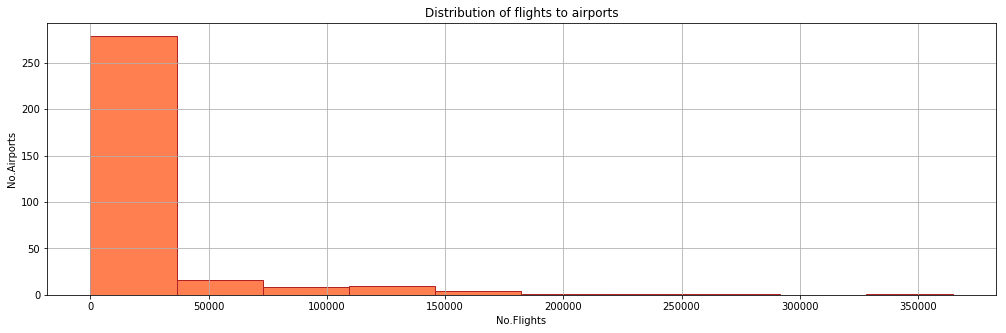

In [0]:
total_flights = flights.groupby(['ORIGIN']).size()
total_flights.hist(color='coral', edgecolor='firebrick', 
                   figsize=(17, 5))
plt.xlabel('No.Flights')
plt.ylabel('No.Airports')
plt.title('Distribution of flights to airports')

Since we did not define a `bins` attribute, matplot uses the default number of bins (n=10).
However, as we can see from the above histogram, there is a huge amount of observations gathered in the first bin, meaning that most airports have between 0 and ~36.000 flights. We get a sense that our histogram fails to capture a sufficiently descriptive picture about our data. That's why we will try to find the optimal number of bins and then recreate our histogram, using more bins.

To select the optimal number of bins, we will use the Freedman-Diaconis Rule: https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule

Executing the calculations needed:
1. We will calculate the inner quantile, using the interquantile range
2. We will calculate the width of each bin, using the inner quantile
3. We will calculate the number of bins, dividing the max.No.Flights for any airport by the width of each bin

In [0]:
# Importing the function for the interquantile range
from scipy.stats import iqr
# Calculating the inner quantile for our data
inner_quantile = iqr(total_flights, axis=0); print(inner_quantile)

8558.0


In [0]:
# Calculating the width for each bin
width = (2 * inner_quantile) // len(total_flights)**(1/3)
width

2502.0

In [0]:
# Calculating the number of bins needed
bins = (max(total_flights) // width).astype(int); bins

145

Text(0.5,1,'Distribution of flights to airports')

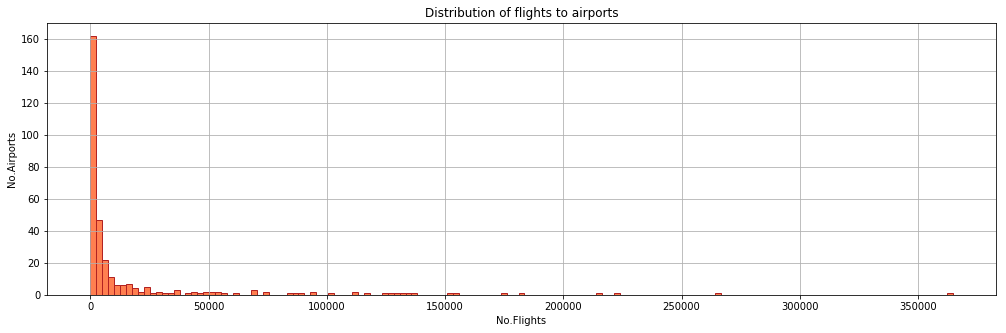

In [0]:
total_flights.hist(bins= bins, color='coral', 
                   edgecolor='firebrick', figsize=(17, 5))
plt.xlabel('No.Flights')
plt.ylabel('No.Airports')
plt.title('Distribution of flights to airports')


## Task 4


> We are interested in the temporal distribution of delays, so create a plot that shows the number of flights and the number of delayed flights per month of year.


To create a plot that show the number of flights and the number of delayed flights per month of year, first, we will create a table that includes these values. To create the table:
1. We add a new column to our original dataset, that extracts the Month from the 'FL_DATE' column
2. We create a new variable, that includes the No. of delayed flights, grouped by Month
3. We create a new variable, that includes the No. of Total flights, grouped by Month
4. We create a new dataframe that includes these 2 calculated columns and month as the index


In [0]:
# Adding a new column to our original dataset, that extracts the Month from the 'FL_DATE' column
flights['Month'] = pd.to_datetime(flights['FL_DATE']).dt.month
# We create a new variable, that includes the No. of delayed flights, grouped by Month
dld = flights[flights['DEP_DELAY'] > 0].groupby(['Month']).size()
# We create a new variable, that includes the No. of Total flights, grouped by Month
ttl = flights.groupby(['Month']).size()

# We create a new dataframe that includes these 2 calculated columns and month as the index
ttl_flights = pd.DataFrame({'Delayed':dld, 'Total_Flights':ttl})
ttl_flights.head(12)

,Delayed,Total_Flights
Month,,
1,168917,450017
2,123829,410517
3,167616,488597
4,163361,468329
5,177199,486483
6,197546,494266
7,197083,509070
8,188467,510451
9,124555,458727


Next, we create a simple barplot that showss:
* With orange: the total number of flights for each month
* With blue: the number of delayed flights per month

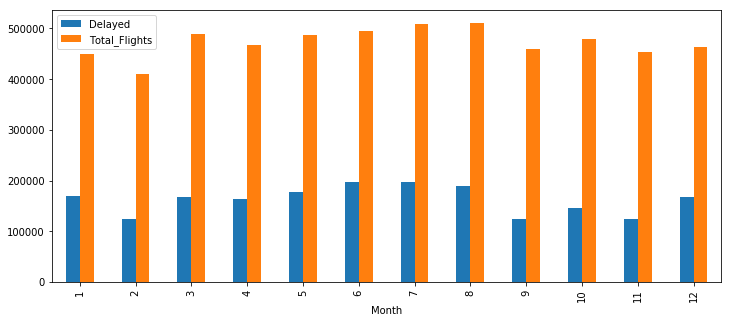

In [0]:
ttl_flights.plot(kind='bar', figsize=(12,5), stacked=False)

However, it might be a better idea to create a stacked barplot, in order to better visualize the relationship between delayed flights and total flights. To do that:
1. We create a new variable, which is the difference between total flights and delayed flights. We do that, in order to avoid having a stacked bar that includes the delayed flights twice.
2. We set the x locations for the groups according to the values of the index (=Months)
3. We define the characteristics we want for the bars, making sure that the second bar is stacked on top of the first one
4. We define the attributes of the figure (such as axis titles, legend details, etc)

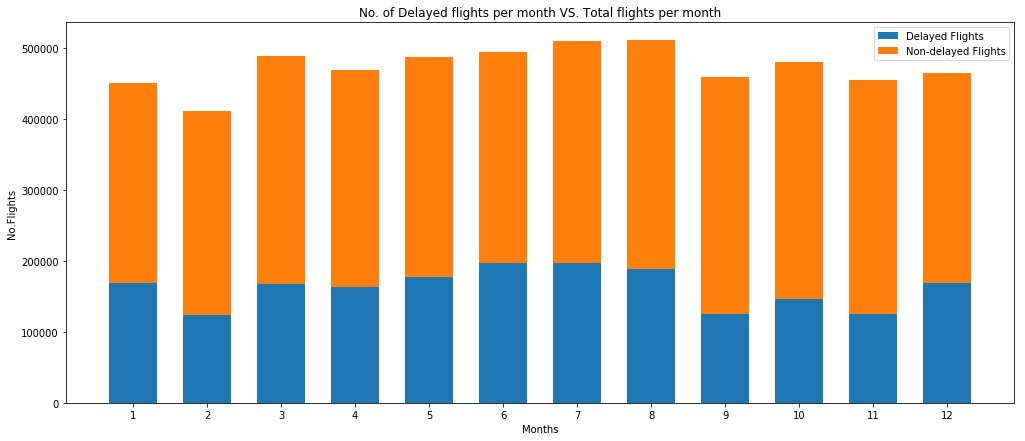

In [0]:
diff = ttl - dld # We use the ttl and dld attributes we defined in the previous step
ind = ttl_flights.index.values # the x locations for the groups
width = 0.65 # the width of the bars

plt.figure(figsize=(17,7)) 
p1 = plt.bar(ind, dld, width) # delayed flights bar
p2 = plt.bar(ind, diff, width, bottom=dld) # non-delayed flights bar (stacked on top of p1) witht the bottom=dld attribute

plt.ylabel('No.Flights') # Y axis label
plt.xlabel('Months') # X axis label
plt.title('No. of Delayed flights per month VS. Total flights per month') # Title of the figure
plt.xticks(ind) # X axis ticks
plt.legend((p1[0], p2[0]), ('Delayed Flights', 'Non-delayed Flights')) # legend details

plt.show()

### IMPORANT NOTE: Using this method, we should keep in mind that the height of each bar (=the blue and orange stacked bars combined) is equal to the total number of flights. The orange part of the bar shows the number of non-delayed flights.

## Task 5

> Provide a table that shows, for each possible origin and destination, which airline has the best performance, in terms of mean departure delay. With this table at hand, show how you can determine the best airline for a particular pair of origin and destination airports.



In order to produce a table that show the pairs of possible origins and destinations, as well as each airline's performance:
1. We create a new data frame, using a multiple index consisting of `ORIGIN` and `DEST`
2. Find the mean for the column `DEP_DELAY` for each combination of `ORIGIN`, `DEST` and `CARRIER`, using group by

In [0]:
# We create a new data frame, using a multi-index, consisting of the columns ORIGIN and DEST
pairs = flights.set_index(['ORIGIN','DEST'])
# We sort the new table, using the levels of the indices.
pairs = pairs.sort_index(level=['ORIGIN','DEST'])

# We can take a look at the table if we want, by un-commenting the following line
# pairs

Using groupby, we extract the mean of the `DEP_DELAY` column for each group of `ORIGIN`, `DEST` and `CARRIER`.
The table `pairs_new` shows, for each possible origin and destination, the average departure delay of each airline that serves this route.

In [0]:
pairs_new = pairs.groupby(['ORIGIN','DEST','CARRIER'])['DEP_DELAY'].mean()
pairs_new.head(20)

ORIGIN  DEST  CARRIER
ABE     ATL   DL           4.723164
              EV          15.730983
        DTW   EV         100.629630
              OO           9.452926
        ORD   EV           9.872928
              OO          15.220657
ABI     DFW   EV          19.875000
        GRK   EV          75.000000
ABQ     ATL   DL           6.023256
        AUS   WN           5.441860
        BWI   WN           9.421642
        DAL   WN           9.748954
        DEN   F9           8.878049
              OO           1.098940
              UA           1.992661
              WN           8.083654
        DFW   AA           5.729875
        HOU   WN           7.969488
        IAH   EV           3.718750
              OO          17.905292
Name: DEP_DELAY, dtype: float64

For each combination of `ORIGIN` and `DEST` we can see what is the minimum mean delay time, between all the carriers that serve this route.

In [0]:
pairs_new.min(level=[0,1]).head(10)

ORIGIN  DEST
ABE     ATL      4.723164
        DTW      9.452926
        ORD      9.872928
ABI     DFW     19.875000
        GRK     75.000000
ABQ     ATL      6.023256
        AUS      5.441860
        BWI      9.421642
        DAL      9.748954
        DEN      1.098940
Name: DEP_DELAY, dtype: float64

If, given a combination of `ORIGIN` and `DEST`, we wanted to find out which carrier has the lowest mean departure delay we could find it, using the `.loc` function and defining the `ORIGIN` and `DEST` 3-letter codes we want. Then, by defining the columns we want (`CARRIER` and `DEP_DELAY`) and using the `mean()` function, we can find the mean departure delay for each carrier. Finally, by sorting the table in ascending order, we can see which airline has the lowest mean departure delay.

In [0]:
pairs.loc[(['LAX'], ['SFO']), 
          ['CARRIER', 'DEP_DELAY']].groupby(['CARRIER']).mean().sort_values(by='DEP_DELAY', ascending=True).rename(columns={'DEP_DELAY':'AVG_DEP_DELAY'})

,AVG_DEP_DELAY
CARRIER,
UA,9.144136
VX,20.541726
DL,21.874426
WN,27.662265
OO,32.872453
AA,37.750000


We can also pass this routine into a function, which will take as input from the user 2 airport codes (origin and destination) and will show the performance of each airline that serves this route, in terms of mean departure delay, as well as the airline that has the minimum avg departure delay.

In [0]:
def routeDelay(origin, destination):
    print(' ')
    result = carriers.join((pairs.loc[(origin, destination), ['CARRIER', 'DEP_DELAY']].groupby(['CARRIER']).mean().sort_values(by='DEP_DELAY', ascending=True).rename(columns={'DEP_DELAY':'AVG_DEP_DELAY'}))
, how='right')
    print(result)
    print(' ')
    print('The lowest average departure delay for this trip is: ')
    print(result.head(1))

user_origin = input("What's the origin airport (3-letter code)? ")
user_destination = input("What's the destination airport (3-letter code)? ")
routeDelay(user_origin, user_destination)


What's the origin airport (3-letter code)? LAX
What's the destination airport (3-letter code)? SFO
 
                    Description  AVG_DEP_DELAY
CARRIER                                       
UA        United Air Lines Inc.       9.144136
VX               Virgin America      20.541726
DL         Delta Air Lines Inc.      21.874426
WN       Southwest Airlines Co.      27.662265
OO        SkyWest Airlines Inc.      32.872453
AA       American Airlines Inc.      37.750000
 
The lowest average departure delay for this trip is: 
                   Description  AVG_DEP_DELAY
CARRIER                                      
UA       United Air Lines Inc.       9.144136
